<a id="imports"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Imports</center></h1>



In [232]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint

<a id="LoadData"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Loading Data</center></h1>



In [233]:
df = pd.read_csv('/content/1_breast-cancer.csv')
# để đọc dữ liệu từ tập tin

In [234]:
df.head()
# xem trước 1 số hàng đầu tiên của data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8494032,B,9.653,33.08,106.94,503.2,0.14854,0.11601,0.1119,0.04561,...,9.62,30.42,71.70,947.2,0.11274,0.15855,0.223,0.089,0.3440,0.06432
1,8277134,B,9.909,15.22,77.27,836.9,0.16332,0.21563,0.0992,0.07729,...,8.87,40.17,101.46,291.3,0.17684,0.52630,0.326,0.159,0.3225,0.12311
2,6433438,M,16.590,27.63,56.24,290.9,0.05767,0.03576,0.2013,0.02446,...,16.35,13.88,66.39,987.8,0.14559,0.52898,0.150,0.072,0.4039,0.13237
3,8120296,M,16.529,18.91,112.90,878.6,0.07389,0.13996,0.0173,0.05447,...,13.67,24.39,84.68,526.6,0.11646,0.56898,1.218,0.121,0.3664,0.09014
4,8213475,M,15.550,27.70,106.07,387.0,0.13174,0.21961,0.0285,0.00471,...,8.50,34.17,52.25,587.4,0.18958,0.51774,0.174,0.014,0.3266,0.14290


In [235]:
df.drop('id', axis=1, inplace=True) #drop redundant columns
# loại bỏ cột id ra khỏi data
# axis = 0: loại bỏ các hàng , axis = 1 loại bỏ các cột
# inplace = true : thực hiện trực tiếp trên data hiện tại

In [236]:
df.head()
# xem trước 1 số hàng đầu tiên của data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,9.653,33.08,106.94,503.2,0.14854,0.11601,0.1119,0.04561,0.1869,...,9.62,30.42,71.70,947.2,0.11274,0.15855,0.223,0.089,0.3440,0.06432
1,B,9.909,15.22,77.27,836.9,0.16332,0.21563,0.0992,0.07729,0.2155,...,8.87,40.17,101.46,291.3,0.17684,0.52630,0.326,0.159,0.3225,0.12311
2,M,16.590,27.63,56.24,290.9,0.05767,0.03576,0.2013,0.02446,0.2110,...,16.35,13.88,66.39,987.8,0.14559,0.52898,0.150,0.072,0.4039,0.13237
3,M,16.529,18.91,112.90,878.6,0.07389,0.13996,0.0173,0.05447,0.2510,...,13.67,24.39,84.68,526.6,0.11646,0.56898,1.218,0.121,0.3664,0.09014
4,M,15.550,27.70,106.07,387.0,0.13174,0.21961,0.0285,0.00471,0.1403,...,8.50,34.17,52.25,587.4,0.18958,0.51774,0.174,0.014,0.3266,0.14290


<a id="EDA"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>EDA</center></h1>
    


In [237]:
px.pie(df, 'diagnosis', color='diagnosis',color_discrete_sequence=['#007500','#5CFF5C'],title='Data Distribution')
# tạo ra lược đồ hình tròn từ data


Từ biểu đồ này, chúng ta kết luận rằng:
Dữ liệu không cân bằng, độ chính xác sẽ không phải là một độ đo đánh giá tốt cho tập dữ liệu này.

In [238]:
for column in  df.drop('diagnosis',axis=1).columns[:5]:
    fig = px.box(data_frame=df,x='diagnosis',color='diagnosis',y=column,color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show()
# tạo ra một loạt các biểu đồ boxplot cho 5 cột đầu tiên


In [239]:
for column in  df.drop('diagnosis',axis=1).columns[5:10]:
    fig = px.scatter(data_frame=df,color='diagnosis',x=column,color_discrete_sequence=['#007500','#5CFF5C'],)
    fig.show()
# tạo ra một loạt các biểu đồ scatter plot cho các biến tính năng trong DataFrame df, bắt đầu từ cột thứ 5 đến cột thứ 9

Kiểm tra tương quan với mục tiêu

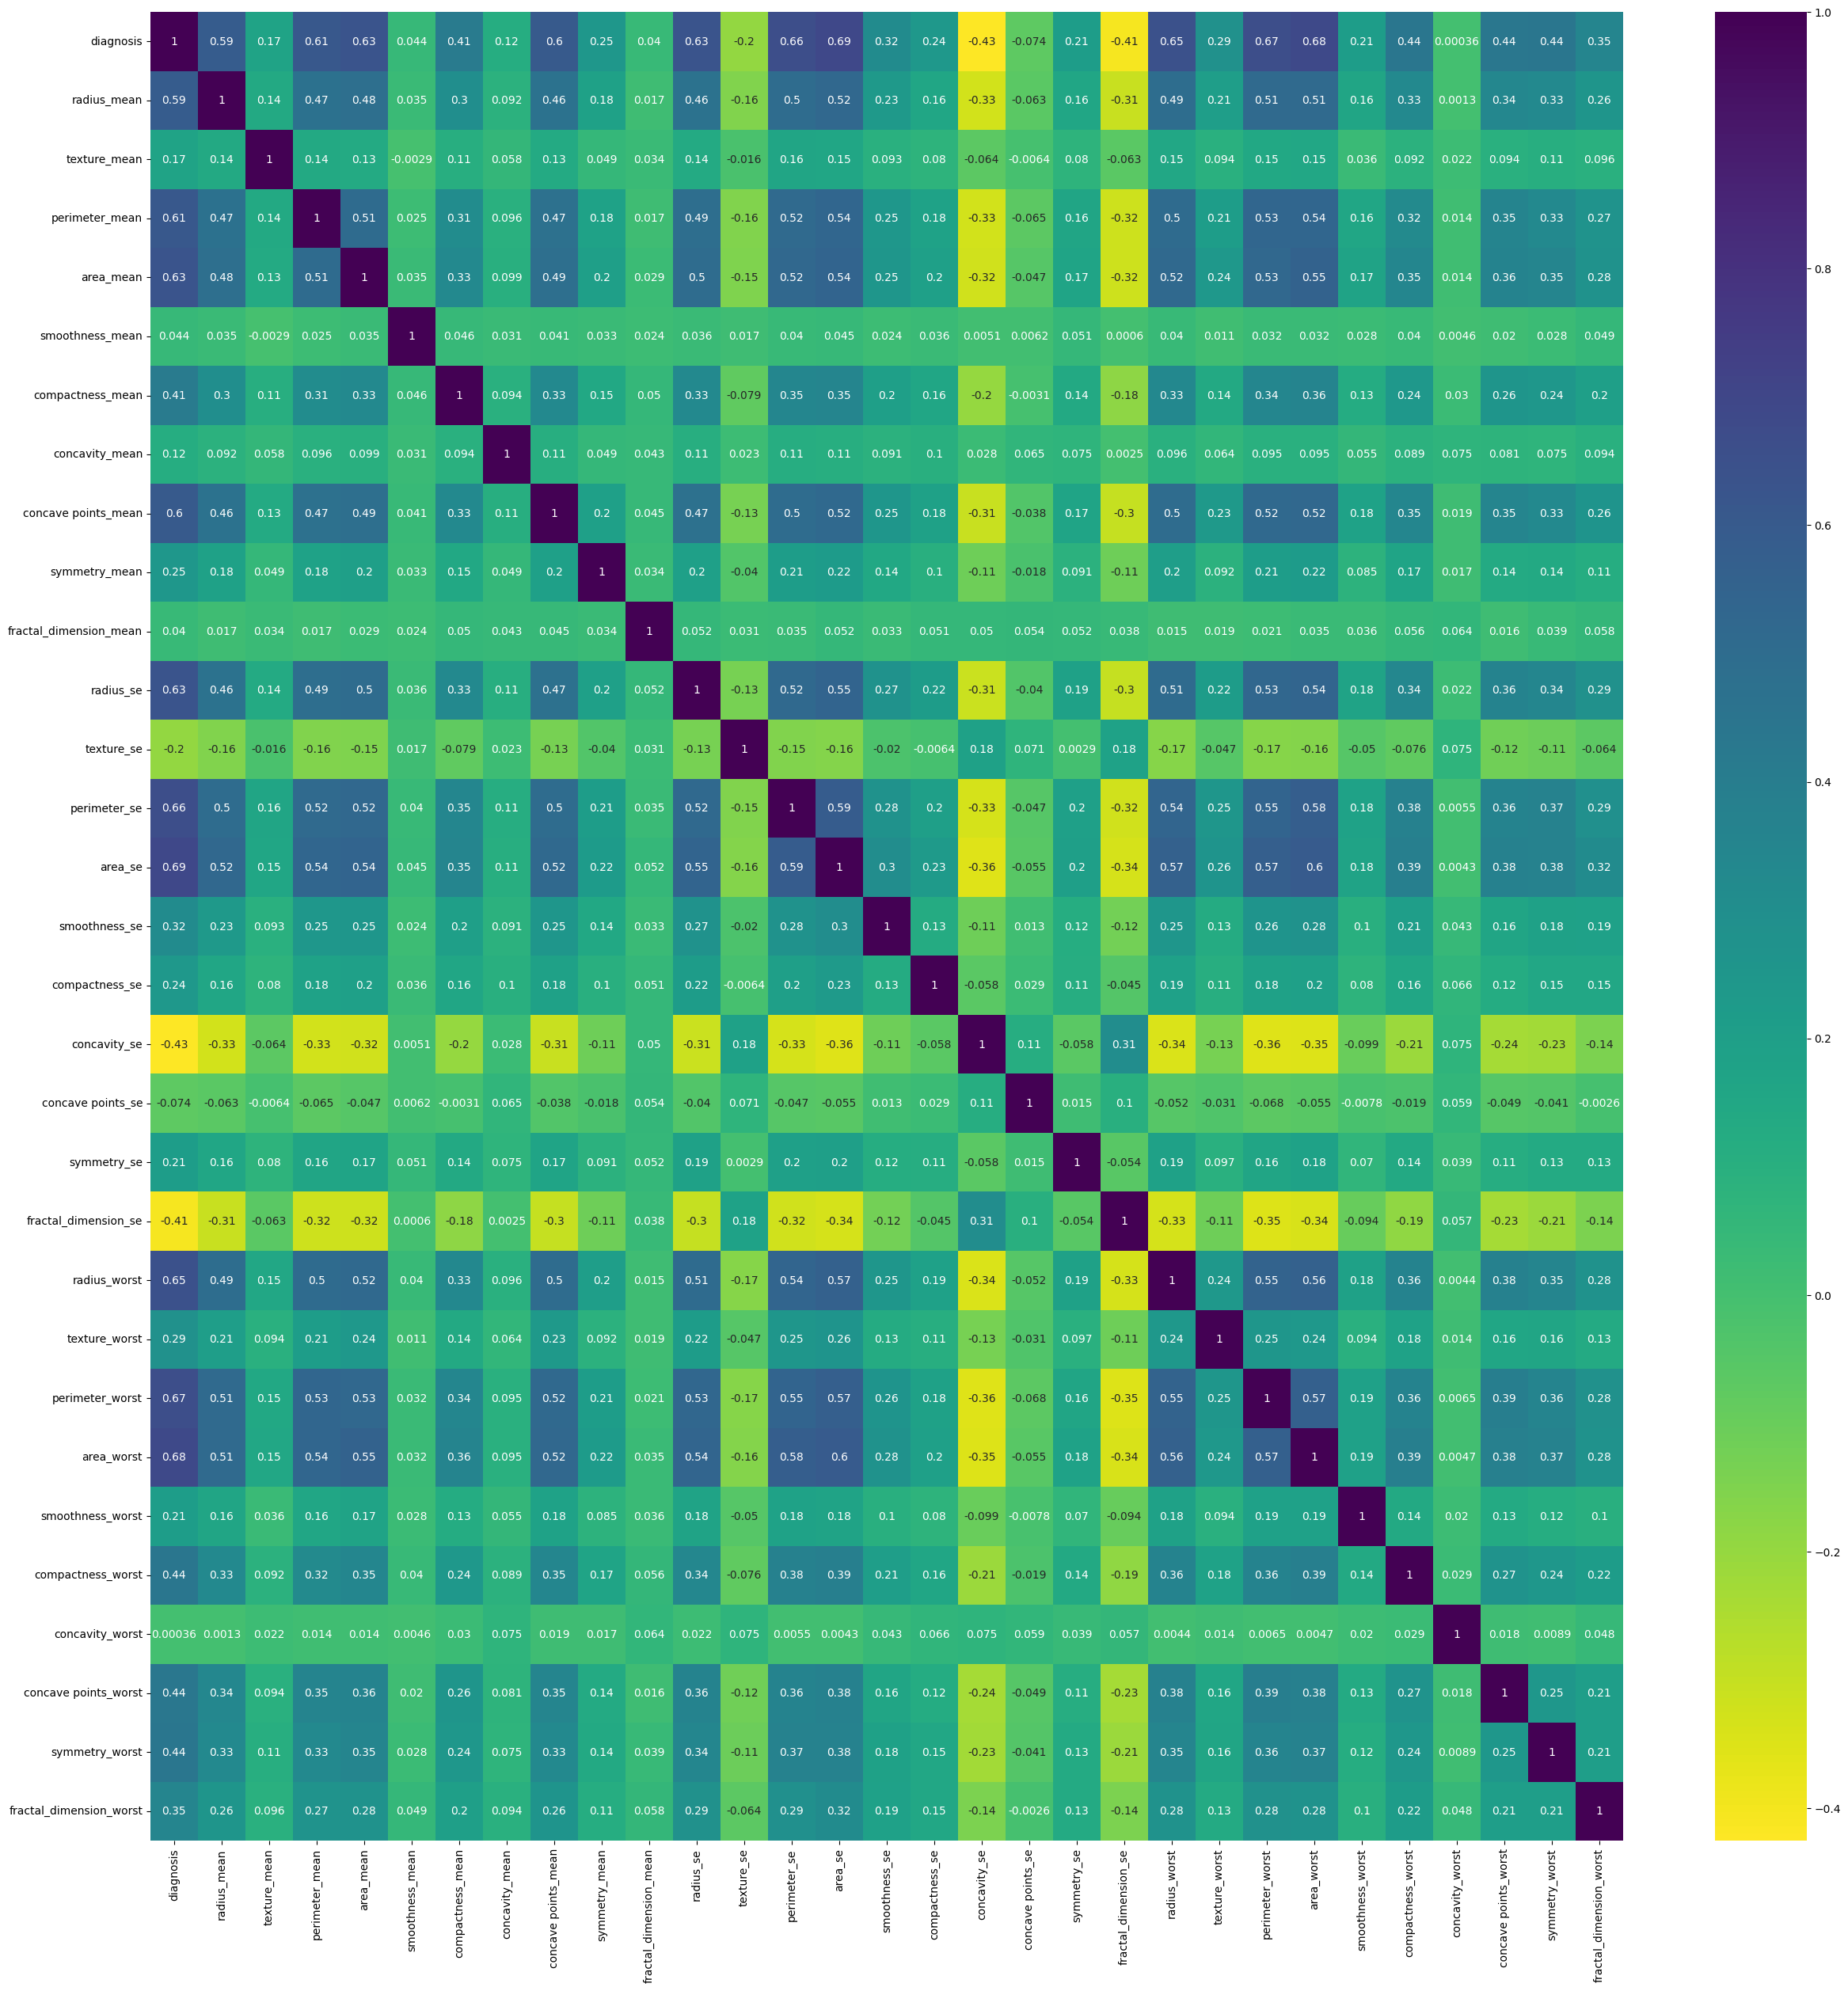

In [240]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()
# thực hiện việc mã hóa nhãn của cột 'diagnosis' thành các giá trị số nguyên 0 và 1, sau đó tính ma trận tương quan

Một số đặc điểm không tương quan với mục tiêu, có lẽ chúng ta sẽ loại bỏ chúng.



<a id="FeatureSelection"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Feature Selection</center></h1>

# Feature Selection


In [241]:
# Get the absolute value of the correlation
# Lấy giá trị tuyệt đối của hệ số tương quan
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.99)
# Chọn ra các đặc trưng có giá trị tương quan tuyệt đối lớn hơn 0.25
relevant_features = cor_target[cor_target>0.25]

# Collect the names of the features
# Tạo danh sách tên các đặc trưng có giá trị tương quan lớn hơn 0.25 bằng cách lặp qua các mục (items) trong relevant_features.
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
# Loại bỏ 'diagnosis' ra khỏi danh sách tên các đặc trưng vì đây là biến mục tiêu chứ không phải đặc trưng
names.remove('diagnosis')
# Display the results
# in danh sách
pprint.pprint(names)

# phân tích mối tương quan giữa các đặc trưng (features) trong một DataFrame và chọn ra các đặc trưng có mối tương quan cao với biến mục tiêu

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'concavity_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


Gán dữ liệu huấn luyện và nhãn huấn luyện

In [242]:
X = df[names].values
y = df['diagnosis'].values.reshape(-1,1)
# Chuẩn bị các đặc trưng (features) để làm biến đầu vào (X):
# Chuẩn bị biến mục tiêu (target variable) để làm biến đầu ra (y):
# reshape(-1, 1): Chuyển đổi mảng 1 chiều thành mảng 2 chiều với một cột và số hàng tương ứng với số mẫu dữ liệu

In [243]:
# Đoạn mã này định nghĩa một hàm scale để chuẩn hóa (standardize) dữ liệu trong mảng X.
def scale(X):
    """
   Chuẩn hóa dữ liệu trong mảng X.

Tham số:
    X (numpy.ndarray): Mảng đặc trưng có kích thước (n_samples, n_features).

Trả về:
    numpy.ndarray: Mảng đặc trưng đã được chuẩn hóa.
      """
   # Tính giá trị trung bình và độ lệch chuẩn của mỗi đặc trưng
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

   # Chuẩn hóa dữ liệu
    X = (X - mean) / std

    return X

In [244]:
X = scale(X)

In [245]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    test_indices = np.random.choice(n_samples, n_test, replace=False)
    train_indices = np.array([i for i in range(n_samples) if i not in test_indices])
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test


In [246]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            most_common_label = max(set(nearest_labels), key=nearest_labels.count)
            predictions.append(most_common_label)
        return predictions

    # def confusion_matrix(self, y_true, y_pred):
    #     """
    #     Computes the confusion matrix.

    #     Parameters
    #     ----------
    #     y_true : array-like, shape (n_samples,)
    #         The true class labels.
    #     y_pred : array-like, shape (n_samples,)
    #         The predicted class labels.

    #     Returns
    #     -------
    #     cm : dict
    #         A dictionary containing the values for TP, TN, FP, and FN.
    #     """
    #     TP = np.sum((y_true == 1) & (y_pred == 1))
    #     TN = np.sum((y_true == 0) & (y_pred == 0))
    #     FP = np.sum((y_true == 0) & (y_pred == 1))
    #     FN = np.sum((y_true == 1) & (y_pred == 0))

    #     cm = {
    #         'TP': TP,
    #         'TN': TN,
    #         'FP': FP,
    #         'FN': FN
    #     }

    #     return cm

    # def precision(self, y_true, y_pred):
    #     """
    #     Computes the precision.

    #     Parameters
    #     ----------
    #     y_true : array-like, shape (n_samples,)
    #         The true class labels.
    #     y_pred : array-like, shape (n_samples,)
    #         The predicted class labels.

    #     Returns
    #     -------
    #     precision : float
    #         The precision score.
    #     """
    #     cm = self.confusion_matrix(y_true, y_pred)
    #     TP = cm['TP']
    #     FP = cm['FP']
    #     precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    #     return precision

    # def recall(self, y_true, y_pred):
    #     """
    #     Computes the recall.

    #     Parameters
    #     ----------
    #     y_true : array-like, shape (n_samples,)
    #         The true class labels.
    #     y_pred : array-like, shape (n_samples,)
    #         The predicted class labels.

    #     Returns
    #     -------
    #     recall : float
    #         The recall score.
    #     """
    #     cm = self.confusion_matrix(y_true, y_pred)
    #     TP = cm['TP']
    #     FN = cm['FN']
    #     recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    #     return recall

    # def f1_score(self, y_true, y_pred):
    #     """
    #     Computes the F1-score.

    #     Parameters
    #     ----------
    #     y_true : array-like, shape (n_samples,)
    #         The true class labels.
    #     y_pred : array-like, shape (n_samples,)
    #         The predicted class labels.

    #     Returns
    #     -------
    #     f1_score : float
    #         The F1-score.
    #     """
    #     precision = self.precision(y_true, y_pred)
    #     recall = self.recall(y_true, y_pred)
    #     f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    #     return f1

    # def log_loss(self, y_true, y_pred_prob):
    #     """
    #     Computes the log loss.

    #     Parameters
    #     ----------
    #     y_true : array-like, shape (n_samples,)
    #         The true class labels.
    #     y_pred_prob : array-like, shape (n_samples,)
    #         The predicted class probabilities.

    #     Returns
    #     -------
    #     log_loss : float
    #         The log loss.
    #     """
    #     eps = 1e-15
    #     y_pred_prob = np.clip(y_pred_prob, eps, 1 - eps)
    #     log_loss = -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
    #     return log_loss


In [247]:
def confusion_matrix(y_true, y_pred):
    """
    Computes the confusion matrix.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        numpy array: The confusion matrix
    """
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(unique_classes)
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        cm[true_label, pred_label] += 1
    return cm

def precision(y_true, y_pred, class_label, unique_classes):
    """
    Computes the precision.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.
        class_label: The label for which precision is to be calculated.
        unique_classes (numpy array): A numpy array of unique class labels.

    Returns:
    ----------
        float: The precision score for the specified class label.
    """
    cm = confusion_matrix(y_true, y_pred)
    class_index = np.where(unique_classes == class_label)[0][0]
    tp = cm[class_index, class_index]
    fp = np.sum(cm[:, class_index]) - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    return precision

def recall(y_true, y_pred, class_label, unique_classes):
    """
    Computes the recall.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.
        class_label: The label for which recall is to be calculated.
        unique_classes (numpy array): A numpy array of unique class labels.

    Returns:
    ----------
        float: The recall score for the specified class label.
    """
    cm = confusion_matrix(y_true, y_pred)
    class_index = np.where(unique_classes == class_label)[0][0]
    tp = cm[class_index, class_index]
    fn = np.sum(cm[class_index, :]) - tp
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return recall

def f1_score(y_true, y_pred, class_label, unique_classes):
    """
    Computes the F1-score.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.
        class_label: The label for which F1-score is to be calculated.
        unique_classes (numpy array): A numpy array of unique class labels.

    Returns:
    ----------
        float: The F1-score for the specified class label.
    """
    precision_val = precision(y_true, y_pred, class_label, unique_classes)
    recall_val = recall(y_true, y_pred, class_label, unique_classes)
    f1 = 2 * (precision_val * recall_val) / (precision_val + recall_val) if (precision_val + recall_val) > 0 else 0
    return f1


In [228]:
X = df[names].values
y = df['diagnosis'].values

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
X_train = scale(X_train)
X_test = scale(X_test)

# Huấn luyện mô hình
k = 5
model = KNN(k)
model.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
predictions = model.predict(X_test)

# Đánh giá mô hình
acc = (predictions == y_test.flatten()).mean()
print("K =", k)

# In danh sách các nhãn lớp từ y_test và predictions
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in predictions:", np.unique(predictions))


print(f"Custom Accuracy: {acc}")
cm = confusion_matrix(y_test, predictions)
precision_score = [precision(y_test, predictions, 0, np.unique(np.concatenate((y_test, predictions)))), precision(y_test, predictions, 1, np.unique(np.concatenate((y_test, predictions))))]
recall_score = [recall(y_test, predictions, 0, np.unique(np.concatenate((y_test, predictions)))), precision(y_test, predictions, 1, np.unique(np.concatenate((y_test, predictions))))]
f1 = [f1_score(y_test, predictions, 0, np.unique(np.concatenate((y_test, predictions)))), precision(y_test, predictions, 1, np.unique(np.concatenate((y_test, predictions))))]

print("Accuracy:", acc)
print("Confusion Matrix:")
print(cm)
print("Precision:", precision_score)
print("Recall", recall_score)
print("F1-score:", f1)




K = 5
Unique labels in y_test: [0 1]
Unique labels in predictions: [0 1]
Custom Accuracy: 0.9408023483365949
Accuracy: 0.9408023483365949
Confusion Matrix:
[[1265   69]
 [  52  658]]
Precision: [0.9605163249810175, 0.9050894085281981]
Recall [0.9482758620689655, 0.9050894085281981]
F1-score: [0.954356846473029, 0.9050894085281981]


In [229]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
skmodel = KNeighborsClassifier(n_neighbors=5)
skmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [230]:
sk_predictions = skmodel.predict(X_test)
sk_accuracy = accuracy_score(y_test, sk_predictions)
print(f" sklearn-model got accuracy score of : {sk_accuracy}")

 sklearn-model got accuracy score of : 0.9408023483365949


In [231]:
#So sánh dự đoán giữa các mô hình
matches = np.sum(predictions == sk_predictions)

#Tính phần trăm dự đoàn giống nhau
total_samples = len(predictions)

percentage_matches = (matches / total_samples) * 100
print(f"Percentage of matching predictions: {percentage_matches:.2f}%")

Percentage of matching predictions: 100.00%
